# Gradient Descent for Linear Regression (Multiple feature) & Feature Scaling
The provided code implements the gradient descent algorithm for a multiple feature or input and feature scaling with z-score normalitation method. I am utilizing the ['sri-lanka-house-prices-dataset'](https://www.kaggle.com/datasets/lasaljaywardena/sri-lanka-house-prices-dataset) dataset obtained from Kaggle which contains the prices of houses in various regions of Sri Lanka. However, in this implementation i will use only ten rows of data and there are three independent variables (feature) and one dependent variable (target). The independent variables are 'Baths', 'Beds', and 'House size'. The dependent variable is 'Price'.


## Import dataset from Kaggle
This dataset was sourced from Kaggle and imported for use in this context.


In [208]:
!chmod 600 /content/kaggle.json

In [206]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d lasaljaywardena/sri-lanka-house-prices-dataset

sri-lanka-house-prices-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [140]:
import zipfile
zip_file = zipfile.ZipFile('/content/sri-lanka-house-prices-dataset.zip','r')
zip_file.extractall()

In [141]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎‎ ‎ ‎ ‎ ‎ ‎  

## Data Training
There are ten rows of training data, and i have converted the values to integers.

In [142]:
# Read a CSV file named "house_prices.csv" and
# display the first 10 rows of the data
path = "house_prices.csv"
adv = pd.read_csv(path, usecols=['Baths','Beds','House size', 'Price'])
adv.head(10)

,Price,Baths,Beds,House size
0,"Rs 5,400,000",1,3,"1,600.0 sqft"
1,"Rs 16,800,000",3,3,"1,480.0 sqft"
2,"Rs 20,000,000",2,3,"2,800.0 sqft"
3,"Rs 187,000,000",5,5,"4,000.0 sqft"
4,"Rs 1,300,000",1,2,900.0 sqft
5,"Rs 55,000,000",4,4,"3,300.0 sqft"
6,"Rs 45,000,000",4,4,"4,100.0 sqft"
7,"Rs 16,700,000",3,3,"1,400.0 sqft"
8,"Rs 50,000,000",4,4,"4,000.0 sqft"
9,"Rs 16,000,000",1,3,"2,000.0 sqft"


In [147]:
adv['Price'] = adv['Price'].replace('[Rs\,]', '', regex=True).astype(int)
adv['House size'] = adv['House size'].replace('[\,sqft]', '', regex=True).astype(int)
adv['Baths'] = adv['Baths'].replace('10+', '10').astype(int)
adv['Beds'] = adv['Beds'].replace('10+', '10').astype(int)
# Display the first 10 rows of the updated DataFrame
print(adv.head(10))

       Price  Baths  Beds  House size
0    5400000      1     3        1600
1   16800000      3     3        1480
2   20000000      2     3        2800
3  187000000      5     5        4000
4    1300000      1     2         900
5   55000000      4     4        3300
6   45000000      4     4        4100
7   16700000      3     3        1400
8   50000000      4     4        4000
9   16000000      1     3        2000


In [148]:
x_train = adv.drop(columns = 'Price').head(10)
print(x_train)

   Baths  Beds  House size
0      1     3        1600
1      3     3        1480
2      2     3        2800
3      5     5        4000
4      1     2         900
5      4     4        3300
6      4     4        4100
7      3     3        1400
8      4     4        4000
9      1     3        2000


In [149]:
y_train = adv['Price'].head(10)
print('         Price')
print(y_train)

         Price
0      5400000
1     16800000
2     20000000
3    187000000
4      1300000
5     55000000
6     45000000
7     16700000
8     50000000
9     16000000
Name: Price, dtype: int64


In [150]:
x_train  = adv[['Baths', 'Beds', 'House size']].head(10).values

print(f"X shape: {x_train.shape})")
print(x_train)

X shape: (10, 3))
[[   1    3 1600]
 [   3    3 1480]
 [   2    3 2800]
 [   5    5 4000]
 [   1    2  900]
 [   4    4 3300]
 [   4    4 4100]
 [   3    3 1400]
 [   4    4 4000]
 [   1    3 2000]]


In [151]:
y_train = adv['Price'].head(10).values.flatten()

print(f"Y shape: {y_train.shape})")
print(y_train)

Y shape: (10,))
[  5400000  16800000  20000000 187000000   1300000  55000000  45000000
  16700000  50000000  16000000]


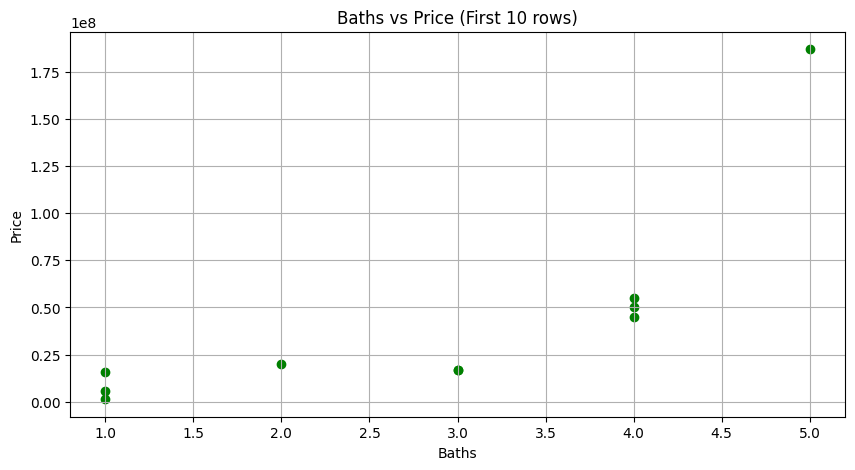

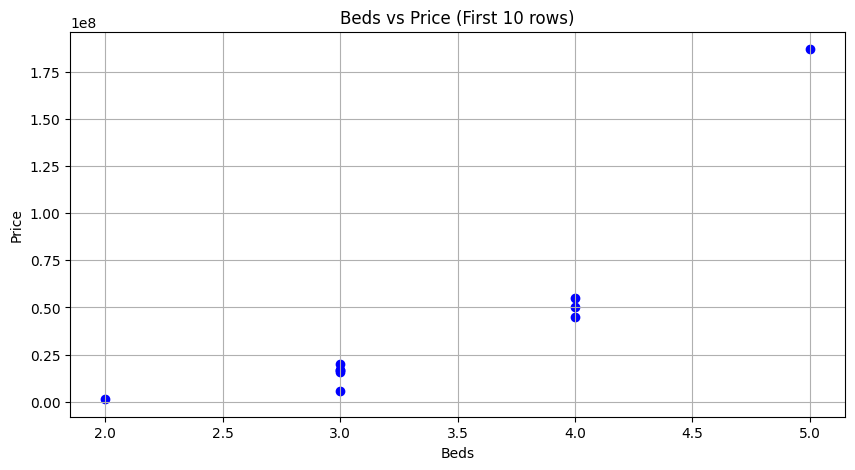

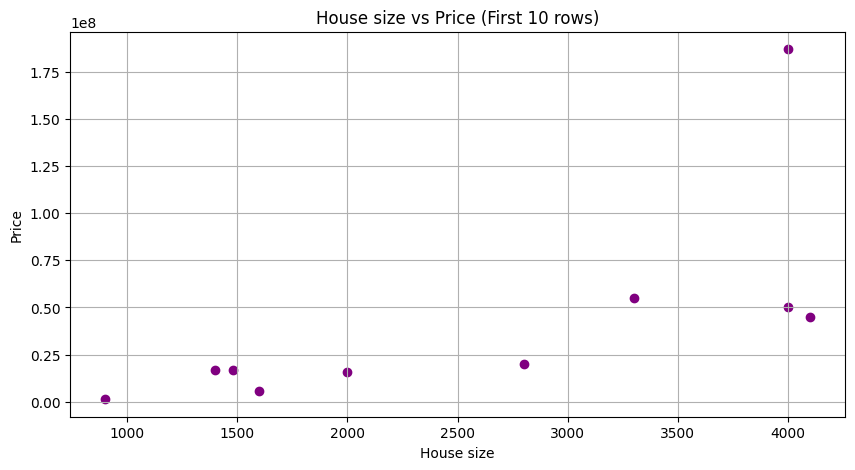

In [194]:
# Scatter plot for Baths vs Price
plt.figure(figsize=(10, 5))
plt.scatter(adv['Baths'].head(10), adv['Price'].head(10), color='green')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.title('Baths vs Price (First 10 rows)')
plt.grid(True)
plt.show()

# Scatter plot for Beds vs Price
plt.figure(figsize=(10, 5))
plt.scatter(adv['Beds'].head(10), adv['Price'].head(10), color='blue')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Beds vs Price (First 10 rows)')
plt.grid(True)
plt.show()

# Scatter plot for House size vs Price
plt.figure(figsize=(10, 5))
plt.scatter(adv['House size'].head(10), adv['Price'].head(10), color='purple')
plt.xlabel('House size')
plt.ylabel('Price')
plt.title('House size vs Price (First 10 rows)')
plt.grid(True)
plt.show()



‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎

## zscore_normalize_features
This function is designed to perform standardization, a process that re-scales each feature or input in the dataset.

*   mu = mean for each feature
*   sigma =  standard deviation for each feature
*   x_norm = the normalized dataset









In [199]:
def zscore_normalize_features(x):

    mu     = np.mean(x, axis=0)
    sigma  = np.std(x, axis=0)
    x_norm = (x - mu) / sigma

    return (x_norm, mu, sigma)

## compute_cost
This function is used to calculate the cost function in the context of linear regression. The cost function measures the **overall** error between the predicted values and the actual values of the target variable.
*  m = total data train
*  f_wb_i = function/model




In [153]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

## compute_gradient
This function calculates the gradients of the cost function with respect to the parameters w and b in the context of linear regression. The function calculates the gradients using the partial derivatives of the cost function.The function returns these average gradients, which will be used in the gradient descent algorithm to update the model parameters w and b iteratively to minimize the cost function.

*   n = total feature/input
*   dj_dw = the gradient of the cost with respect to the parameters w.
*   dj_db = the gradient of the cost with respect to the parameters b.


   








In [154]:
def compute_gradient(x, y, w, b):

    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

## gradient_descent
This function implements the gradient descent algorithm to minimize a cost function during training model.



*   x = data (multiple features)
*   y = target values
*   J_history = An array to store cost J
*   w = weights (parameter)
*   b = bias (parameter)
*   alpha = learning rate
*   num_iters = number of iterations to run gradient descent









In [195]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<num_iters:
            J_history.append( cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.5e}")

    return w, b, J_history

In [190]:
x_norm, x_mu, x_sigma = zscore_normalize_features(x_train)

initial_w = np.zeros(x_train.shape[1])
initial_b = 0

iterations = 1000
alpha = 1.0e-7

w_final, b_final, J_hist = gradient_descent(x_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"\nb,w found by gradient descent: {b_final:0.2f},{w_final} \n")

print(f"Data train prediction with w final and b final\n")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 2.18835e+15   
Iteration  100: Cost 2.18828e+15   
Iteration  200: Cost 2.18822e+15   
Iteration  300: Cost 2.18816e+15   
Iteration  400: Cost 2.18809e+15   
Iteration  500: Cost 2.18803e+15   
Iteration  600: Cost 2.18796e+15   
Iteration  700: Cost 2.18790e+15   
Iteration  800: Cost 2.18784e+15   
Iteration  900: Cost 2.18777e+15   

b,w found by gradient descent: 4131.79,[3865. 4467. 3453.] 

Data train prediction with w final and b final

prediction: 5545460.84, target value: 5400000
prediction: 5138887.15, target value: 16800000
prediction: 9692372.78, target value: 20000000
prediction: 13855950.08, target value: 187000000
prediction: 3124216.53, target value: 1300000
prediction: 11430840.30, target value: 55000000
prediction: 14192871.27, target value: 45000000
prediction: 4862684.05, target value: 16700000
prediction: 13847617.40, target value: 50000000
prediction: 6926476.32, target value: 16000000


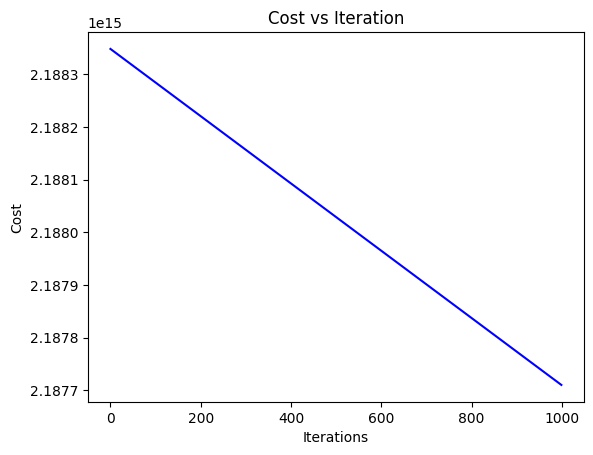

In [191]:
# Plot cost vs iteration
plt.plot(range(iterations), J_hist, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

As the number of iterations increases, the cost gradually decreases. This indicates that the optimization algorithm is effectively approaching a minimum in the cost function.

## Prediction
After obtaining the optimal values for the parameters w and b, we can now utilize the model to predict price based on our learned parameters.

In [203]:
print(f"Prediction for a 2 baths, 3 beds, and 18000 sqft house: Rs.{np.dot([2, 3, 18000], w_final) + b_final:0.2f}")
print(f"Prediction for a 3 baths, 5 beds, and 25000 sqft house: Rs.{np.dot([3, 5, 25000], w_final) + b_final:0.2f}")

Prediction for a 2 baths, 3 beds, and 18000 sqft house: Rs.62170961.30
Prediction for a 3 baths, 5 beds, and 25000 sqft house: Rs.86351532.22


## Original Data vs Normalize Data








In [200]:
# normalize the original features
x_norm, x_mu, x_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {x_mu}, \nX_sigma = {x_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

X_mu = [   3.    3. 2558.], 
X_sigma = [   1.    1. 1167.]
Peak to Peak range by column in Raw        X:[   4    3 3200]
Peak to Peak range by column in Normalized X:[3. 4. 3.]


So this is the peak-to-peak range (the difference between the maximum and minimum values) for each feature in the **original dataset**. The peak-to-peak range for 'Baths' is 4, for 'Beds' is 3, and for 'House size' is 3200. The peak-to-peak ranges **after normalization** are approximately 3 for 'Baths', 4 for 'Beds', and 3 for 'House size'.

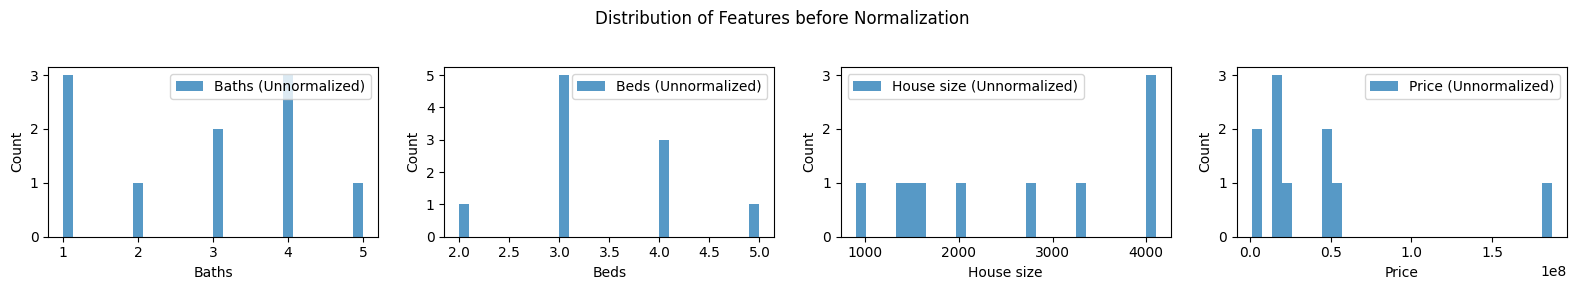

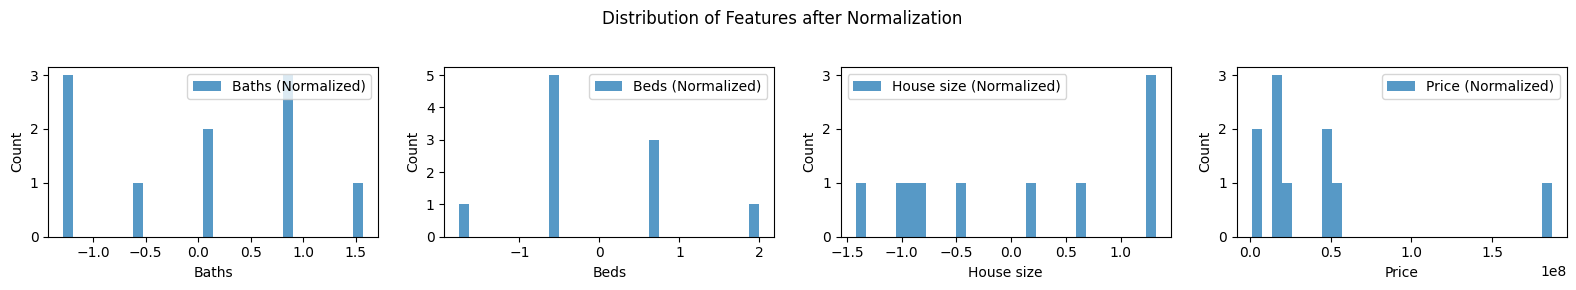

In [159]:
# Define a function to plot normalized and unnormalized distributions
def norm_plot(ax, data, label):
    ax.hist(data, bins=30, alpha=0.75, label=label)

# Assuming x_train contains the data for 'Baths', 'Beds', 'House size', and 'Price'
x_train_baths = x_train[:, 0]
x_train_beds = x_train[:, 1]
x_train_house_size = x_train[:, 2]
y_train_price = y_train

# Plot before normalization
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

# Plot 'Baths' before normalization
norm_plot(ax[0], x_train_baths, 'Baths (Unnormalized)')
ax[0].set_xlabel('Baths')
ax[0].set_ylabel('Count')
ax[0].legend()

# Plot 'Beds' before normalization
norm_plot(ax[1], x_train_beds, 'Beds (Unnormalized)')
ax[1].set_xlabel('Beds')
ax[1].set_ylabel('Count')
ax[1].legend()

# Plot 'House size' before normalization
norm_plot(ax[2], x_train_house_size, 'House size (Unnormalized)')
ax[2].set_xlabel('House size')
ax[2].set_ylabel('Count')
ax[2].legend()

# Plot 'Price' before normalization
norm_plot(ax[3], y_train_price, 'Price (Unnormalized)')
ax[3].set_xlabel('Price')
ax[3].set_ylabel('Count')
ax[3].legend()

fig.suptitle('Distribution of Features before Normalization')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot after normalization
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

# Plot 'Baths' after normalization
norm_plot(ax[0], x_norm[:, 0], 'Baths (Normalized)')
ax[0].set_xlabel('Baths')
ax[0].set_ylabel('Count')
ax[0].legend()

# Plot 'Beds' after normalization
norm_plot(ax[1], x_norm[:, 1], 'Beds (Normalized)')
ax[1].set_xlabel('Beds')
ax[1].set_ylabel('Count')
ax[1].legend()

# Plot 'House size' after normalization
norm_plot(ax[2], x_norm[:, 2], 'House size (Normalized)')
ax[2].set_xlabel('House size')
ax[2].set_ylabel('Count')
ax[2].legend()

# Plot 'Price' after normalization
norm_plot(ax[3], y_train_price, 'Price (Normalized)')
ax[3].set_xlabel('Price')
ax[3].set_ylabel('Count')
ax[3].legend()

fig.suptitle('Distribution of Features after Normalization')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()